<a href="https://colab.research.google.com/github/JosueAfouda/MLflow/blob/main/machine_learning_pipeline_mlflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **MACHINE LEARNING PIPELINE AVEC MLFOW**

* **Automatiser l'analyse exploratoire des données ;**

* **Automatiser la construction de pipelines de machine learning ;**

* **Définir, exécuter et analyser des expériences avec MLflow.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive/YouTube/MLflow')

In [3]:
!ls

machine-learning-pipeline-mlflow.ipynb	y_train_OXxrJt1.csv
X_train_J01Z4CN.csv


# Importation des données

In [4]:
import pandas as pd
import numpy as np

In [5]:
xtrain = pd.read_csv('X_train_J01Z4CN.csv')
xtrain

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37364,35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37365,36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,...,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37366,35864579,duplex,48.864204,2.808693,magny-le-hongre,77700,9281.0,NaN,NaN,NaN,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
ytrain = pd.read_csv('y_train_OXxrJt1.csv')
ytrain

,id_annonce,price
0,35996577,355000.0
1,35811033,190000.0
2,35731841,39000.0
3,35886765,299000.0
4,35781137,478000.0
...,...,...
37363,35881571,190000.0
37364,35890109,399000.0
37365,36010245,328000.0
37366,35864579,463000.0


# Analyse exploratoire des données

In [8]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [9]:
df = xtrain.merge(ytrain, on='id_annonce', how='inner')
df

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,price
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355000.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39000.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,299000.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,478000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0
37364,35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399000.0
37365,36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,...,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,328000.0
37366,35864579,duplex,48.864204,2.808693,magny-le-hongre,77700,9281.0,NaN,NaN,NaN,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,463000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37368 entries, 0 to 37367
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_annonce                   37368 non-null  int64  
 1   property_type                37368 non-null  object 
 2   approximate_latitude         37368 non-null  float64
 3   approximate_longitude        37368 non-null  float64
 4   city                         37368 non-null  object 
 5   postal_code                  37368 non-null  int64  
 6   size                         36856 non-null  float64
 7   floor                        9743 non-null   float64
 8   land_size                    15581 non-null  float64
 9   energy_performance_value     19068 non-null  float64
 10  energy_performance_category  19068 non-null  object 
 11  ghg_value                    18530 non-null  float64
 12  ghg_category                 18530 non-null  object 
 13  exposition      

In [11]:
from pandas_profiling import ProfileReport

In [14]:
profile = ProfileReport(
    df,
    title="Analyse exploratoire des biens immobiliers en France",
    html={'style':{'full_width':True}}
)

profile.to_file(output_file = "data-profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
!ls

data-profile.html			X_train_J01Z4CN.csv
machine-learning-pipeline-mlflow.ipynb	y_train_OXxrJt1.csv


# Pipeline de machine learning

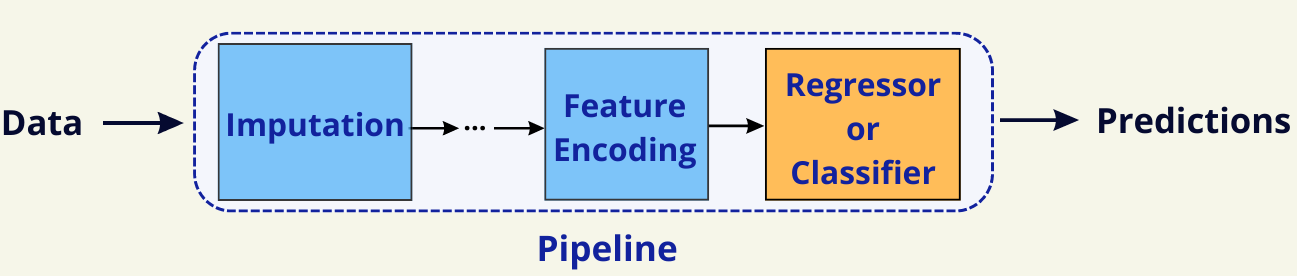

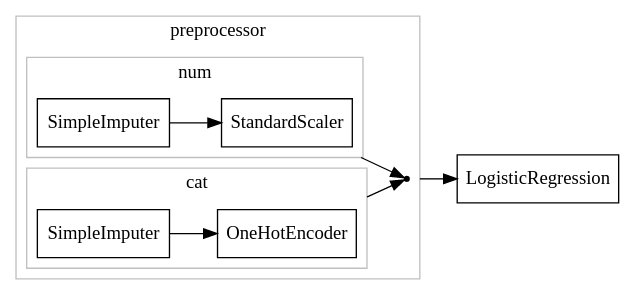

In [16]:
num_vars = xtrain.drop('id_annonce', axis=1).select_dtypes(exclude=['object']).columns
num_vars

Index(['approximate_latitude', 'approximate_longitude', 'postal_code', 'size',
       'floor', 'land_size', 'energy_performance_value', 'ghg_value',
       'nb_rooms', 'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places',
       'nb_boxes', 'nb_photos', 'has_a_balcony', 'nb_terraces', 'has_a_cellar',
       'has_a_garage', 'has_air_conditioning', 'last_floor', 'upper_floors'],
      dtype='object')

In [18]:
cat_vars = xtrain.drop('id_annonce', axis=1).drop(num_vars, axis=1).columns
cat_vars

Index(['property_type', 'city', 'energy_performance_category', 'ghg_category',
       'exposition'],
      dtype='object')

In [19]:
df.isnull().sum()

id_annonce                         0
property_type                      0
approximate_latitude               0
approximate_longitude              0
city                               0
postal_code                        0
size                             512
floor                          27625
land_size                      21787
energy_performance_value       18300
energy_performance_category    18300
ghg_value                      18838
ghg_category                   18838
exposition                     28274
nb_rooms                        1566
nb_bedrooms                     2733
nb_bathrooms                   13273
nb_parking_places                  0
nb_boxes                           0
nb_photos                          0
has_a_balcony                      0
nb_terraces                        0
has_a_cellar                       0
has_a_garage                       0
has_air_conditioning               0
last_floor                         0
upper_floors                       0
p

In [22]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [25]:
from sklearn.compose import ColumnTransformer

In [28]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

In [29]:
seed = 1234

In [35]:
def build_pipeline(algo_ml, impute_num = SimpleImputer(strategy="median"), impute_var=SimpleImputer(strategy="constant", fill_value="Unknown"), scaler = StandardScaler()):
  # Pipeline de transformation des variables numériques
  numeric_transformer = make_pipeline(
    (impute_num), 
    (scaler)
    )
  
  # Pipeline de transformation des variables catégorielles
  categorical_transformer = make_pipeline(
    (impute_var),
    (OneHotEncoder(handle_unknown="ignore"))
    )
  
  # Combinaison des 2 étapes en un seul objet
  preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ]
    )
  
  # Pipeline final de Machine Learning
  model = Pipeline(steps=[('preprocessing', preprocessor), 
                        ('regressor', algo_ml)])
  
  return model

In [36]:
build_pipeline(algo_ml=RandomForestRegressor(random_state=seed))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['approximate_latitude', 'approximate_longitude', 'postal_code', 'size',
       'floor', 'land_size', 'energy_performance_value', 'ghg_value',
       'nb_rooms', 'nb_bedrooms', 'nb_bathrooms'...
       'has_a_garage', 'has_air_conditioning', 'last_floor', 'upper_floors'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                        

# Définition, exécution et analyse des expériences avec Mlflow

In [38]:
#pip install mlflow

In [39]:
import mlflow

In [41]:
mlflow.set_experiment("Baseline-Models")

2022/08/22 00:36:28 INFO mlflow.tracking.fluent: Experiment with name 'Baseline-Models' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/drive/MyDrive/YouTube/MLflow/mlruns/1', experiment_id='1', lifecycle_stage='active', name='Baseline-Models', tags={}>

In [42]:
!ls

data-profile.html			X_train_J01Z4CN.csv
machine-learning-pipeline-mlflow.ipynb	y_train_OXxrJt1.csv
mlruns


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Données d'entraînement, de validation et de test
seed = 4321
X_train, X_test, y_train, y_test = train_test_split(
    xtrain.drop('id_annonce', axis = 1), 
    ytrain['price'], 
    test_size=0.4, 
    random_state=seed
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test,
    y_test,
    test_size = 0.5,
    random_state=seed
)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(22420, 26)
(22420,)
(7474, 26)
(7474,)
(7474, 26)
(7474,)


In [47]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
def eval_metrics(actual, pred):
  mape = mean_absolute_percentage_error(actual, pred) * 100
  rmse = np.sqrt(mean_squared_error(actual, pred))
  return mape, rmse

In [48]:
mlflow.sklearn.autolog() # Tracking automatique des modèles Sklearn

with mlflow.start_run(run_name = 'random_forest_default'):
  
  # Générer le pipeline modèle
  model = build_pipeline(algo_ml = RandomForestRegressor(random_state = seed, n_jobs = -1))

  # Entraîner le pipeline modèle
  model.fit(X_train, y_train)

  # Prédictions sur les données d'entraînement
  train_preds = model.predict(X_train)

  # Métriques de performances sur les données d'entraînement
  train_mape, train_rmse = eval_metrics(y_train, train_preds)

  # Prédictions sur les données de validation
  val_preds = model.predict(X_val)

  # Métriques de performances sur les données de validation
  val_mape, val_rmse = eval_metrics(y_val, val_preds)

  mlflow.log_metric("train_mape_experience", train_mape)

  mlflow.log_metric("train_rmse_experience", train_rmse)

  mlflow.log_metric("val_mape_experience", val_mape)

  mlflow.log_metric("val_rmse_experience", val_rmse)

  # Sauvegarde du modèle
  mlflow.sklearn.log_model(model, "rf_run1")

  print("Mean Absolute Percentage Error on Train Data:", train_mape) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

  print("Mean Absolute Percentage Error on Validation Data:", val_mape) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

  print("Root Mean Squared Error on Train Data:", train_rmse) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

  print("Root Mean Squared Error on Validation Data:", val_rmse) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

  print("Model run ID: ", mlflow.active_run().info.run_uuid) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

mlflow.end_run()

2022/08/22 00:52:28 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('preprocessing', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['approximate_latitude', 'approximate_longitude', 'postal_code', 'size',
       'floor', 'land_size', 'energ...`
2022/08/22 00:52:28 WARNING mlflow.utils: Truncated the value of the key `preprocessing`. Truncated value: `ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                              

Mean Absolute Percentage Error on Train Data: 13.433707025993764
Mean Absolute Percentage Error on Validation Data: 36.723793596592024
Root Mean Squared Error on Train Data: 59946.940545504534
Root Mean Squared Error on Validation Data: 159177.69499670382
Model run ID:  66c15b689b3741459544134ca88a677b


In [49]:
mlflow.sklearn.autolog() # Tracking automatique des modèles Sklearn

with mlflow.start_run(run_name = 'random_forest2'):
  
  # Générer le pipeline modèle
  model = build_pipeline(algo_ml = RandomForestRegressor(random_state = seed, n_jobs = -1), impute_num=SimpleImputer(strategy="mean"), impute_var=SimpleImputer(strategy="most_frequent"), scaler=RobustScaler())

  # Entraîner le pipeline modèle
  model.fit(X_train, y_train)

  # Prédictions sur les données d'entraînement
  train_preds = model.predict(X_train)

  # Métriques de performances sur les données d'entraînement
  train_mape, train_rmse = eval_metrics(y_train, train_preds)

  # Prédictions sur les données de validation
  val_preds = model.predict(X_val)

  # Métriques de performances sur les données de validation
  val_mape, val_rmse = eval_metrics(y_val, val_preds)

  mlflow.log_metric("train_mape_experience", train_mape)

  mlflow.log_metric("train_rmse_experience", train_rmse)

  mlflow.log_metric("val_mape_experience", val_mape)

  mlflow.log_metric("val_rmse_experience", val_rmse)

  # Sauvegarde du modèle
  mlflow.sklearn.log_model(model, "rf_run2")

  print("Mean Absolute Percentage Error on Train Data:", train_mape) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

  print("Mean Absolute Percentage Error on Validation Data:", val_mape) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

  print("Root Mean Squared Error on Train Data:", train_rmse) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

  print("Root Mean Squared Error on Validation Data:", val_rmse) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

  print("Model run ID: ", mlflow.active_run().info.run_uuid) # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique

mlflow.end_run()

2022/08/22 01:06:20 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('preprocessing', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 Index(['approximate_latitude', 'approximate_longitude', 'postal_code', 'size',
       'floor', 'land_size', 'energy_performance_value',...`
2022/08/22 01:06:20 WARNING mlflow.utils: Truncated the value of the key `preprocessing`. Truncated value: `ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('robustscaler',
                                                 

Mean Absolute Percentage Error on Train Data: 13.569515265712754
Mean Absolute Percentage Error on Validation Data: 37.46735814458423
Root Mean Squared Error on Train Data: 60139.272781183434
Root Mean Squared Error on Validation Data: 159031.04170241568
Model run ID:  4fe912227b574c7388df217b1fbffcc6


In [51]:
#pip install pyngrok

In [52]:
from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "27IT7tDgBuITUKPpMMtBOgqr1sY_AxDUUw8cEEVM3ixG299o"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://7b7a-34-86-155-76.ngrok.io


In [53]:
!mlflow ui

[2022-08-22 01:15:49 +0000] [1926] [INFO] Starting gunicorn 20.1.0
[2022-08-22 01:15:49 +0000] [1926] [INFO] Listening at: http://127.0.0.1:5000 (1926)
[2022-08-22 01:15:49 +0000] [1926] [INFO] Using worker: sync
[2022-08-22 01:15:49 +0000] [1929] [INFO] Booting worker with pid: 1929
[2022-08-22 01:22:28 +0000] [1926] [INFO] Handling signal: int

Aborted!
[2022-08-22 01:22:28 +0000] [1929] [INFO] Worker exiting (pid: 1929)
[2022-08-22 01:22:28 +0000] [1926] [INFO] Shutting down: Master


In [54]:
# Prédictions 
import mlflow
logged_model = 'runs:/4fe912227b574c7388df217b1fbffcc6/rf_run1'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
yhat = loaded_model.predict(pd.DataFrame(X_test))

In [55]:
eval_metrics(actual = y_test, pred = yhat)

(37.1941560795292, 159538.8039149002)